In [1]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

# ÏãúÍ∞Ñ Í¥ÄÎ†®
import time

In [2]:
from sklearn.model_selection import StratifiedKFold

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
best_model_path = 'model/best_model_classification_8.dat'

# Stratified K-Fold ÏÑ§Ï†ï (Î∂ÑÎ•òÏóê Ï†ÅÌï©)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
f1_score_list = []
model_name_list = []

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [4]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df1 = pd.read_csv('data/ÏÑ±Í≥ºÏ†ïÎ≥¥_selected_columns.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Segment Ïù∏ÏΩîÎî©
encoder1 = LabelEncoder()
df1["Segment"] = encoder1.fit_transform(df1["Segment"])

# 2. ID, Í∏∞Ï§ÄÎÖÑÏõî Ï†úÍ±∞ ÌõÑ ÏûÖÎ†•(X), Í≤∞Í≥º(y) Ï†ïÏùò
X = df1.drop(['Segment', 'ID', 'Í∏∞Ï§ÄÎÖÑÏõî'], axis=1)
y = df1['Segment']  # Ïù¥ÎØ∏ Ïù∏ÏΩîÎî©Îêú ÏÉÅÌÉú

# 3. ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler1 = StandardScaler()
X2 = scaler1.fit_transform(X)

# 4. ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ìï†Îãπ
train_X = X2
train_y = y

### Í∏∞Î≥∏ Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# F1 Ï†êÏàò Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
f1_score_list = []
model_name_list = []

# XGBoost Î™®Îç∏ (CPU ÏÇ¨Ïö©)
xgboost_basic_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)

# ÍµêÏ∞® Í≤ÄÏ¶ù (F1 Micro Í∏∞Ï§Ä)
r1 = cross_val_score(xgboost_basic_model, train_X, train_y, scoring='f1_micro', cv=cv)

# Í≤∞Í≥º Ï†ÄÏû•
f1_score_list.append(r1.mean())
model_name_list.append("XGBoost Basic (CPU)")

# Í≤∞Í≥º ÌÖåÏù¥Î∏î ÏÉùÏÑ± Î∞è Ï†ïÎ†¨
d1 = {'f1_micro score': f1_score_list}
result_df = pd.DataFrame(d1, index=model_name_list)
result_df.sort_values(by='f1_micro score', ascending=False, inplace=True)

# Í≤∞Í≥º Ï∂úÎ†•
display(result_df)

f1_micro score
XGBoost Basic (CPU)        0.820071

### ÏµúÏ¢Ö Ï†êÍ≤Ä

In [9]:
from xgboost import XGBClassifier

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (CPU ÏÇ¨Ïö©)
best_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Î™®Îç∏ ÌïôÏäµ
best_model.fit(train_X, train_y)

# ÏôÑÎ£å Î©îÏãúÏßÄ
print("‚úÖ CPU ÏÇ¨Ïö© ÌïôÏäµ ÏôÑÎ£å")

‚úÖ CPU ÏÇ¨Ïö© ÌïôÏäµ ÏôÑÎ£å


In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# 1. feature name Î≥µÏõê (XÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞, Ïª¨Îüº Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú)
feature_names = X.columns.tolist() # Ï†ÑÏ≤òÎ¶¨ Ï†Ñ Ïª¨Îüº Ïù¥Î¶Ñ
booster = best_model.get_booster()
booster.feature_names = feature_names  # boosterÏóê ÏßÅÏ†ë Ìï†Îãπ

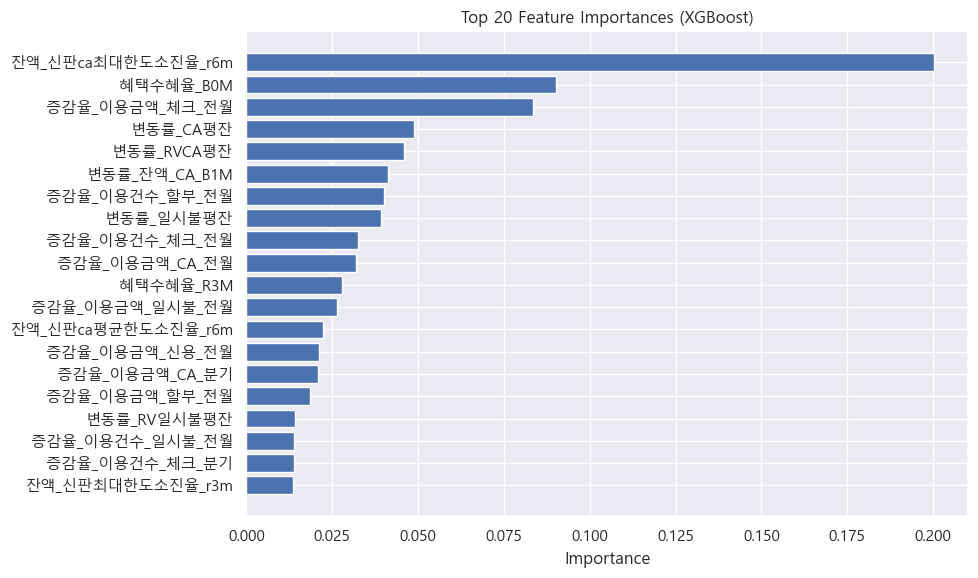

In [11]:
# 2. Feature importance ÏàòÏπò Ï∂îÏ∂ú Î∞è ÏãúÍ∞ÅÌôî (gain Í∏∞Ï§Ä)
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 3. ÏÉÅÏúÑ 20Í∞ú bar ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['feature'][:20][::-1], 
    feature_importance_df['importance'][:20][::-1]
)
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

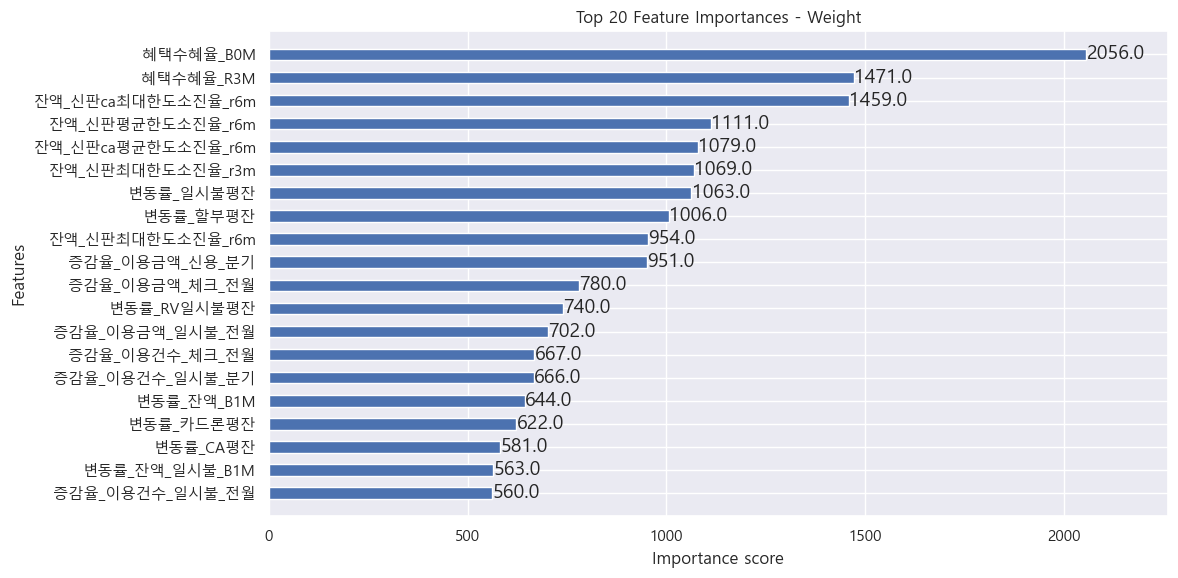

In [12]:
# 4. XGBoost Í∏∞Î≥∏ Ï†úÍ≥µ plot_importance (Ï§ëÎ≥µ import Ï†úÍ±∞)
plot_importance(
    booster, 
    max_num_features=20, 
    height=0.5, 
    importance_type='weight'  # 'gain', 'cover', 'weight' Ï§ë ÏÑ†ÌÉù Í∞ÄÎä•
)
plt.title('Top 20 Feature Importances - Weight')
plt.tight_layout()
plt.show()

 99%|===================| 2479/2500 [00:43<00:00]        

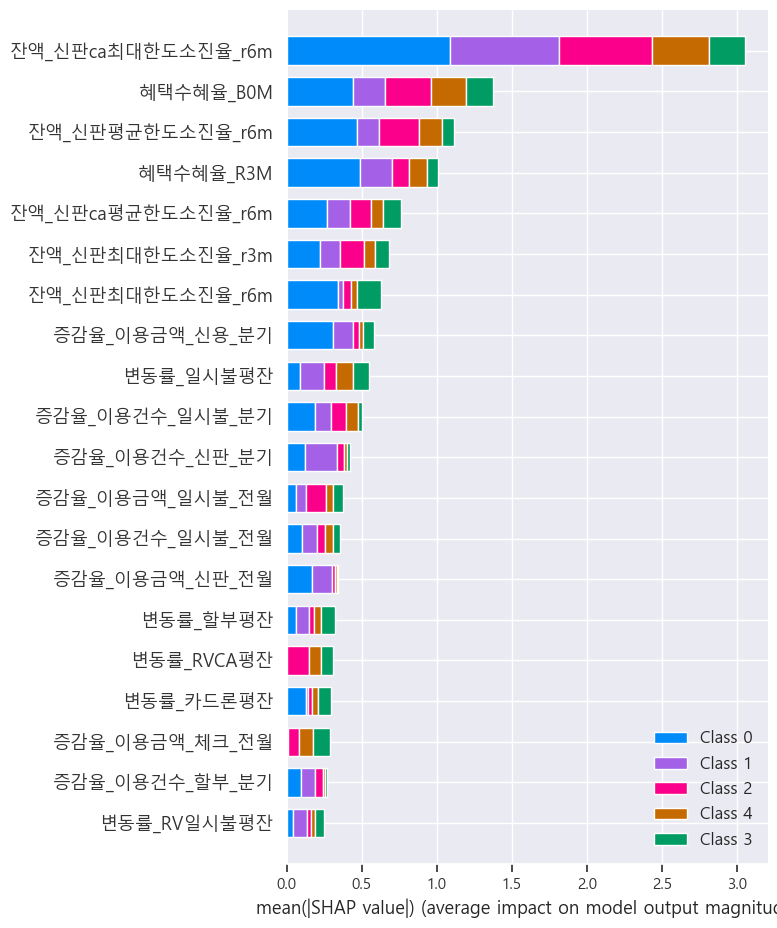

In [13]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# ‚úÖ DataFrameÏúºÎ°ú Î≥ÄÌôòÎêú XÏóêÏÑú Ïù∏Îç±Ïä§Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï∂îÏ∂ú
# Ïòà: train_XÎäî numpy arrayÏßÄÎßå, XÎäî ÏõêÎ≥∏ DataFrameÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
X_df = pd.DataFrame(train_X, columns=feature_names)

# ÏÉòÌîå ÏùºÎ∂ÄÎßå Ï∂îÏ∂ú
X_sample = X_df.sample(n=500, random_state=42)

# SHAP Explainer ÏÉùÏÑ±
explainer = shap.Explainer(best_model, X_df)

# SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_sample)

# summary plot
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [14]:
# ÌïôÏäµ Î™®Îç∏ Îì±ÏùÑ Ï†ÄÏû•ÌïúÎã§.
with open(best_model_path, 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(encoder1, fp)
    pickle.dump(scaler1, fp)

print('Ï†ÄÏû•ÏôÑÎ£å')

Ï†ÄÏû•ÏôÑÎ£å


In [15]:
# Ï†ÄÏû• ÌôïÏù∏
with open(best_model_path, 'rb') as fp :
    test_model = pickle.load(fp)
    test_encoder = pickle.load(fp)
    test_scaler1 = pickle.load(fp)

üìå F1 Score (micro): 0.8243

üìä Classification Report:
              precision    recall  f1-score   support

           A       0.96      0.20      0.33       972
           B       1.00      0.88      0.93       144
           C       0.60      0.14      0.22    127590
           D       0.50      0.27      0.35    349242
           E       0.86      0.97      0.91   1922052

    accuracy                           0.82   2400000
   macro avg       0.78      0.49      0.55   2400000
weighted avg       0.79      0.82      0.79   2400000

üìä Confusion Matrix:
[[    193       0     196     270     313]
 [      0     126       4       8       6]
 [      2       0   17619   42610   67359]
 [      3       0    8081   93309  247849]
 [      2       0    3300   51680 1867070]]


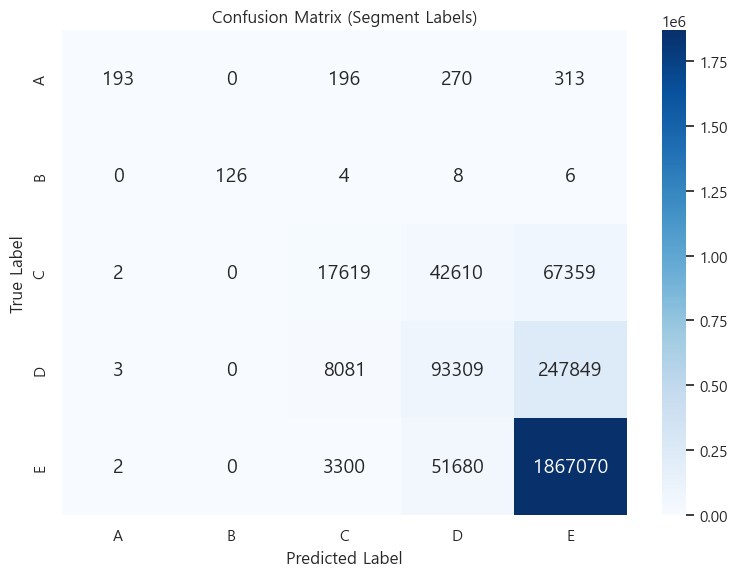

In [16]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ÏòàÏ∏°
y_pred = test_model.predict(train_X)

# üìå F1 Ï†êÏàò Í≥ÑÏÇ∞ (macro)
f1 = f1_score(train_y, y_pred, average='micro')
print(f"üìå F1 Score (micro): {f1:.4f}")

# ‚úÖ ÏõêÎûò ÏÑ∏Í∑∏Î®ºÌä∏ ÎùºÎ≤®Î°ú Î≥µÏõê
true_labels = encoder1.inverse_transform(train_y)
pred_labels = encoder1.inverse_transform(y_pred)
label_names = encoder1.classes_  # ['A', 'B', 'C', 'D', 'E']

# üìä Classification Report (ÎùºÎ≤®Î™Ö Í∏∞Ï§Ä)
print("\nüìä Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=label_names))

# üìä Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=label_names)
print("üìä Confusion Matrix:")
print(cm)

# üé® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix (Segment Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()